In [1]:
#pip install panda
#pip install matplotlib
#pip install numpy
#pip install seaborn
#pip install colorama


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("HospitalDatabase.xlsx")
df_PA = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Patients")
df_ED = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")
df_AmbV = pd.read_excel("HospitalDatabase.xlsx", sheet_name ="AmbulatoryVisits")
df_ReAd = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
df_Dis = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Discharges")
df_Pro = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Providers")
df_EDU = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDUnique")



In [5]:
#1 Which providers had a speciality of Pediatrics and used Telemedicine? Use SQL for it. 

import psycopg2 as ps
import pandas.io.sql as sqlio

conn2=ps.connect(dbname="HospitalDatabase",

user="postgres",password= "TinRoof33",host="localhost",

port="5432")
                
                 
 
sql= """ SELECT DISTINCT p."ProviderName", a."VisitType" FROM "AmbulatoryVisits" as a
JOIN "Providers" as p ON p."ProviderID" = a."ProviderID"
WHERE a."VisitType" = 'Telemedicine' AND p."ProviderSpeciality" = 'Pediatrics' """

df=sqlio.read_sql_query(sql,conn2)

df
     




,ProviderName,VisitType
0,Ala Bama,Telemedicine
1,Barry Bar,Telemedicine
2,Harry Kane,Telemedicine
3,Jordan Michael,Telemedicine
4,Mike Myers,Telemedicine
5,Sally Sue,Telemedicine
6,Ted Black,Telemedicine
7,Ted Green,Telemedicine
8,Ted Texas,Telemedicine


In [1]:
#2 Who is the oldest doctor that did a physical? Connect to SQL. 

import psycopg2 as ps
import pandas.io.sql as sqlio

conn2=ps.connect(dbname="HospitalDatabase",

user="postgres",password= "TinRoof33",host="localhost",

port="5432")
                
                 
 
sql= """ SELECT DISTINCT p."ProviderName", a."VisitType", p."ProviderDateOnStaff" FROM "AmbulatoryVisits" as a
JOIN "Providers" as p ON p."ProviderID" = a."ProviderID"
WHERE a."VisitType" = 'Physical' AND p."ProviderSpeciality" = 'PrimaryCare'
ORDER BY p."ProviderDateOnStaff" ASC limit 1 """

df=sqlio.read_sql_query(sql,conn2)

df


OperationalError: connection to server at "localhost" (::1), port 5432 failed: FATAL:  password authentication failed for user "postgres"


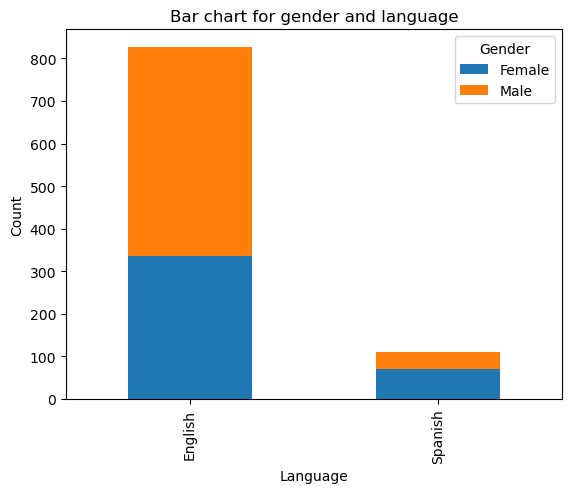

In [10]:
#3 Show the gender and language divisions of patients in a bar chart.  

# Group the dataframe by gender and language and count the number of rows
df_grouped = df_PA.groupby(['Gender', 'Language']).size().reset_index(name='count')

# Pivot the dataframe to get a wide format with gender as columns and language as index
df_pivoted = df_grouped.pivot(index='Language', columns='Gender', values='count')

# Plot the dataframe as a bar chart with stacked bars
df_pivoted.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Bar chart for gender and language')

# Show the plot
plt.show()

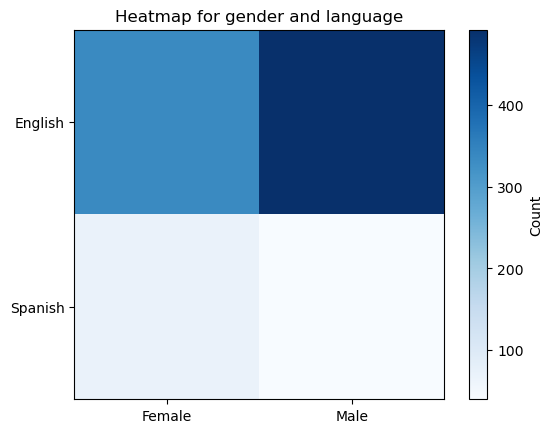

In [11]:
#3.1  Show the gender and language divisions of patients in a heat map. 

# Group the dataframe by gender and language and count the number of rows
df_grouped = df_PA.groupby(['Gender', 'Language']).size().reset_index(name='count')

# Pivot the dataframe to get a wide format with gender as columns and language as index
df_pivoted = df_grouped.pivot(index='Language', columns='Gender', values='count')



plt.imshow(df_pivoted, cmap='Blues', interpolation='nearest')
plt.xticks(range(len(df_pivoted.columns)), df_pivoted.columns)
plt.yticks(range(len(df_pivoted.index)), df_pivoted.index)
plt.colorbar(label='Count')
plt.title('Heatmap for gender and language')
plt.show()






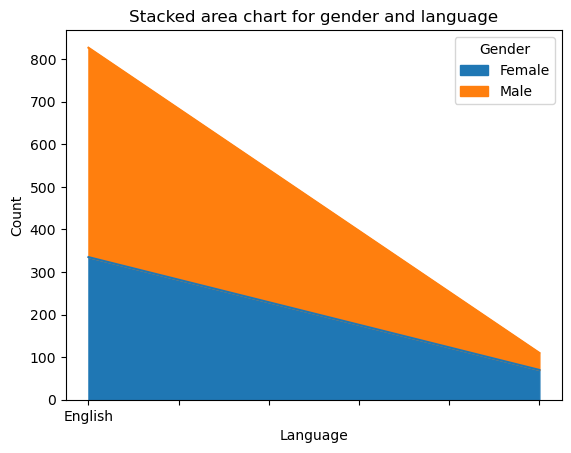

In [12]:
#3.2 Show the gender and language divisions of patients in a stacked area chart.  

Group the dataframe by gender and language and count the number of rows
df_grouped = df_PA.groupby(['Gender', 'Language']).size().reset_index(name='count')

# Pivot the dataframe to get a wide format with gender as columns and language as index
df_pivoted = df_grouped.pivot(index='Language', columns='Gender', values='count')

# Stacked area chart
df_pivoted.plot.area(stacked=True)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Stacked area chart for gender and language')
plt.show()

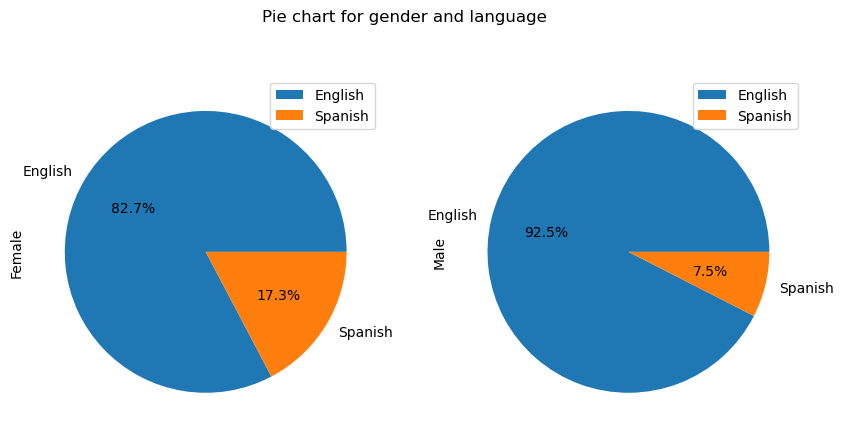

In [13]:
#3.3 Represent the division of Language and gender using a pie chart


#Group the dataframe by gender and language and count the number of rows
df_grouped = df_PA.groupby(['Gender', 'Language']).size().reset_index(name='count')

# Pivot the dataframe to get a wide format with gender as columns and language as index
df_pivoted = df_grouped.pivot(index='Language', columns='Gender', values='count')

# Pie chart or donut chart
df_pivoted.plot.pie(subplots=True, figsize=(10,5), autopct='%1.1f%%')
plt.suptitle('Pie chart for gender and language')
plt.show()


In [19]:
#4 Create a treemap for the relationship between Acuity and the reasons for visit. 


import plotly.express as px

# Group the dataframe by acuity and ReasonForVisit and count the number of rows
df_grouped = df_EDU.groupby(['Acuity', 'ReasonForVisit']).size().reset_index(name='count')

# Plot the dataframe as a treemap with nested rectangles proportional to the count
fig = px.treemap(df_grouped, path=['Acuity', 'ReasonForVisit'], values='count')

# Add title
fig.update_layout(title='Treemap for acuity and ReasonForVisit')

# Show the plot
fig.show()


In [23]:
#5. Show how Discharge disposition, Service and Primary Diagnosis are connected using a chart. 


import plotly.express as px

# Group the dataframe by DischargeDisposition, Service and PrimaryDiagnosis and count the number of rows
df_grouped = df_Dis.groupby(['DischargeDisposition', 'Service', 'PrimaryDiagnosis']).size().reset_index(name='count')

# Plot the dataframe as a sunburst chart with nested rings proportional to the count
fig = px.sunburst(df_grouped, path=['DischargeDisposition', 'Service', 'PrimaryDiagnosis'], values='count')

# Add title
fig.update_layout(title='Sunburst chart for DischargeDisposition, Service and PrimaryDiagnosis')

# Show the plot
fig.show()